<a href="https://colab.research.google.com/github/NYUExperimentalPhysics1-2021/assignment0-gretagoldberg/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#[PyMan 0.9.31 Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

###The following exercises correspond to chapter [6: Conditionals and Loops](https://physics.nyu.edu/pine/pymanual/html/chap6/chap6_loopsconds.html)

##6.4.1

Write two functions to calculate the factorial of a positive integer input by the user. Recall that the factorial function is given by $x! = x (x-1) (x-2) ... (2) (1)$ so that $1!=1$, $2!=2$, $3!=6$, $4!=24$, $...$

1. Write a factorial function "FactorialW" that uses a Python `while` loop.
1. Write a factorial function "FactorialF" that Python `for` loop.

Both functions should take a single integer argument and return the factorial of that number.

Make sure your functions gracefully handle negative input.

Write a for loop that prints x! for x = 1..10. Each line should output something like


```
FactorialW(1) = 1 ; FactorialF(1) = 1
...
FactorialW(10) = 362880 ; FactorialF(10) = 362880
```

In [27]:
##USE THIS CODE BLOCK TO COMPLETE EXERCISE 6.4.1##
def factorialR(n):
  if n<0:
    print("number must be positive")
    raise ValueError 

  if n == 0:
        return 1
  else:
     return n * factorialR(n-1)

def factorialL(n):

  f =1 
  j = 1
  while j <= n:
    f = f*j
    j= (j+1)
  return f

def factorialW(n):
  if n <0:
    raise ValueError
  fact_value = 1
  for i in range(1,n+1):
    fact_value*=i
  return fact_value
  
print(factorialW(3))


6


##6.4.2

The following Python program finds the smallest non-trivial (not 1) prime factor of a positive integer.

```
n = int(raw_input("Input an integer > 1: "))
i = 2

while (n % i) != 0:
    i += 1

print("The smallest factor of n is:", i )
```

1. Type this program into your computer and verify that it works as advertised. Then briefly explain how it works and why the while loop always terminates.
1. Modify the program so that it tells you if the integer input is a prime number or not. If it is not a prime number, write your program so that it prints out the smallest prime factor. Using your program verify that the following integers are prime numbers: 101, 8191, 947431.

In [29]:
##USE THIS CODE BLOCK TO COMPLETE EXERCISE 6.4.2##

n = int(input("Input an integer > 1:"))

isPrime = True

for j in range(2, n):
  if n%j == 0:
    isPrime = False
    break

if isPrime == True:
  print(n, "is prime")

else:
  i = 2
  while (n%i)!= 0:
    i+=1
    if i in [4,6,8,9,10,12,14,15,16,18,20]:
      continue

  print("The smallest factor of", n, "is:", i)

Input an integer > 1:3
3 is prime


##6.4.3

Consider the matrix list `x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]`. Write a list comprehension to extract the last column of the matrix `[3, 6, 9]`. Write another list comprehension to create a vector of twice the square of the middle column `[8, 50, 128]`.

In [30]:
x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
##USE THIS CODE BLOCK TO COMPLETE EXERCISE 6.4.3##
last_column = [a[2] for a in x]

middle_column= [a[1] for a in x]

#for loop to iterate through the array
for i in range(0, len(middle_column)):
  middle_column[i] = (middle_column[i]**2)*2

print(middle_column)


[8, 50, 128]


#[PyMan 0.9.31 Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)

###The following exercises correspond to chapter [7: Functions](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html)

##7.5.1

Write a function that can return each of the first three spherical Bessel functions $j_n(x)$:
>$j_0(x) = \frac{\sin{x}}{x}$

>$j_1(x) = \frac{\sin{x}}{x^2} - \frac{\cos{x}}{x}$

>$j_2(x) = \left(\frac{3}{x^2}-1\right)\frac{\sin{x}}{x}-\frac{3\cos{x}}{x^2}$

Your function should take as arguments a NumPy array $x$ and the order $n$, and should return an array of the designated order $n$ spherical Bessel function. Take care to make sure that your functions behave properly at $x=0$.

Demonstrate the use of your function by writing a Python routine that plots the three Bessel functions for $0 \le x \le 20$. Your plot should look like the one below. 

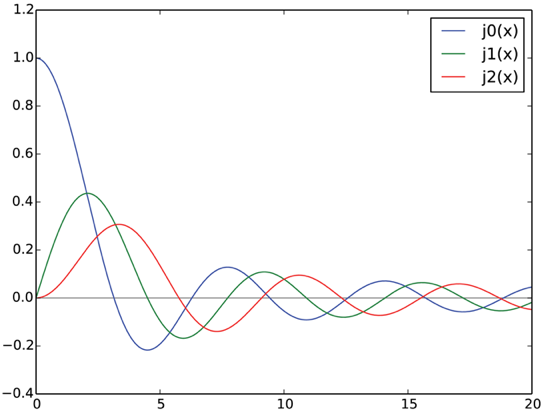

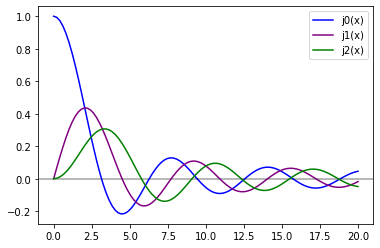

In [12]:
##USE THIS CODE BLOCK TO COMPLETE EXERCISE 7.5.1##
def bessel(x,n):
  eps = 1e-14
  x = np.asarray(np.atleast_1d(x), float)
  x[np.abs(x) <= eps] = eps
  if n == 0:
    return np.sinc(x/np.pi)
  if n == 1:
    return (np.sinc(x/np.pi)-np.cos(x))/x
  if n ==2:
    return (((3-x**2)*np.sinc(x/np.pi)-3*np.cos(x))/x**2)

x = np.linspace(0,20,100)
for i in range(0,3):
  plt.axhline(y=0, color = "black", linewidth = 0.2)
  if i == 0:
    plt.plot(x,bessel(x,0), color = "blue", label = "j0(x)")
  elif i == 1:
      plt.plot(x,bessel(x,1), color = "purple", label = "j1(x)")
  elif i == 2:
      plt.plot(x,bessel(x,2), color = "green", label = "j2(x)")
  plt.legend()

##7.5.2

1. Write a function that simulates the rolling of $n$ dice. Use the NumPy function `random.random_integers(6)`, which generates a random integer between 1 and 6 with equal probability (like rolling fair dice). The input of your function should be the number of dice thrown each roll and the output should be the sum of the $n$ dice.
1. “Roll” 2 dice 10,000 times keeping track of all the sums of each set of rolls in a list. Then use your program to generate a histogram summarizing the rolls of two dice 10,000 times. The result should look like the histogram plotted below. Use the MatPlotLib function `hist` (see http://matplotlib.org/api/pyplot_summary.html) and set the number of bins in the histogram equal to the number of different possible outcomes of a roll of your dice. For example, the sum of two dice can be anything between 2 and 12, which corresponds to 11 possible outcomes. You should get a histogram that looks like the one below.
1. Repeat part (b) using 3 dice and plot the resulting histogram.

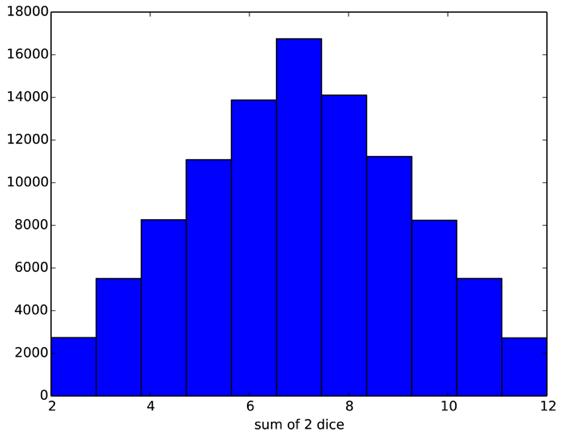

What is the number of dice you would like to throw?3
[5, 2, 6]
The sum of the 3 dice is 13


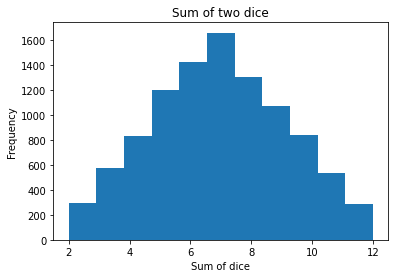

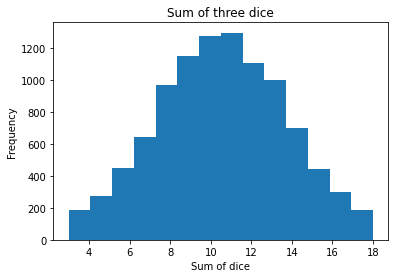

In [25]:
##USE THIS CODE BLOCK TO COMPLETE EXERCISE 7.5.2##
import random

n=input("What is the number of dice you would like to throw?")
n=int(n)

def N(n):
  dice = []
  for i in range(n):
      dice.append(random.randint(1,6))
  print(dice)
  print("The sum of the", n, "dice is", sum(dice))
N(n)

SumList = []

for i in range(10000):
  firstDice = random.randint(1,6)
  secondDice = random.randint(1,6)
  sumofdice = firstDice + secondDice
  SumList.append(sumofdice)

plt.hist(SumList, bins = np.linspace(2,12,12))
plt.xlabel("Sum of dice")
plt.ylabel("Frequency")
plt.title("Sum of two dice")
plt.show()

SumListThreeDice = []
for i in range(10000):
  firstDice2 = random.randint(1,6)
  secondDice2 = random.randint(1,6)
  thirdDice = random.randint(1,6)
  sumofdice2 = firstDice2 + secondDice2 + thirdDice 
  SumListThreeDice.append(sumofdice2)

plt.hist(SumListThreeDice, bins = np.linspace(3,18,15))
plt.xlabel("Sum of dice")
plt.ylabel("Frequency")
plt.title("Sum of three dice")
plt.show()